In [47]:
from google.colab import drive
import pandas as pd
import numpy as np
from os.path import isfile, join
from os import listdir
import matplotlib.pyplot as plt

In [48]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/results/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
queueingTime = pd.read_csv(join(path,'queueingTime.csv'))
queueLength = pd.read_csv(join(path,'queueLength.csv'))
responseTime = pd.read_csv(join(path,'responseTime.csv'))
serverUtilization = pd.read_csv(join(path,'serverUtilization.csv'))
processTimeValues = pd.read_csv(join(path,'processTimeValues.csv'))

In [68]:
queueingTime = queueingTime.rename(columns={'queueingTime:vector Net.sys (#0 - Net1-0-20230829-18:31:09-1522)': 'simTime_elapsed',
                                                                  'Unnamed: 1': 'queueingTime_value'})
queueLength = queueLength.rename(columns={'queueLength:vector Net.sys (#0 - Net1-0-20230829-18:31:09-1522)': 'simTime_elapsed',
                                                      'Unnamed: 1': 'queueLength_value'})
responseTime = responseTime.rename(columns={'responseTime:vector Net.sys (#0 - Net1-0-20230829-18:31:09-1522)': 'simTime_elapsed',
                                                      'Unnamed: 1': 'responseTime_value'})
serverUtilization = serverUtilization.rename(columns={'serverUtilization:vector Net.sys (#0 - Net1-0-20230829-18:31:09-1522)': 'simTime_elapsed',
                                                      'Unnamed: 1': 'serverUtilization_value'})
processTimeValues = processTimeValues.rename(columns={'processTimeValues:vector Net.sys (#0 - Net1-0-20230829-18:31:09-1522)': 'simTime_elapsed',
                                                      'Unnamed: 1': 'processTime_value'})

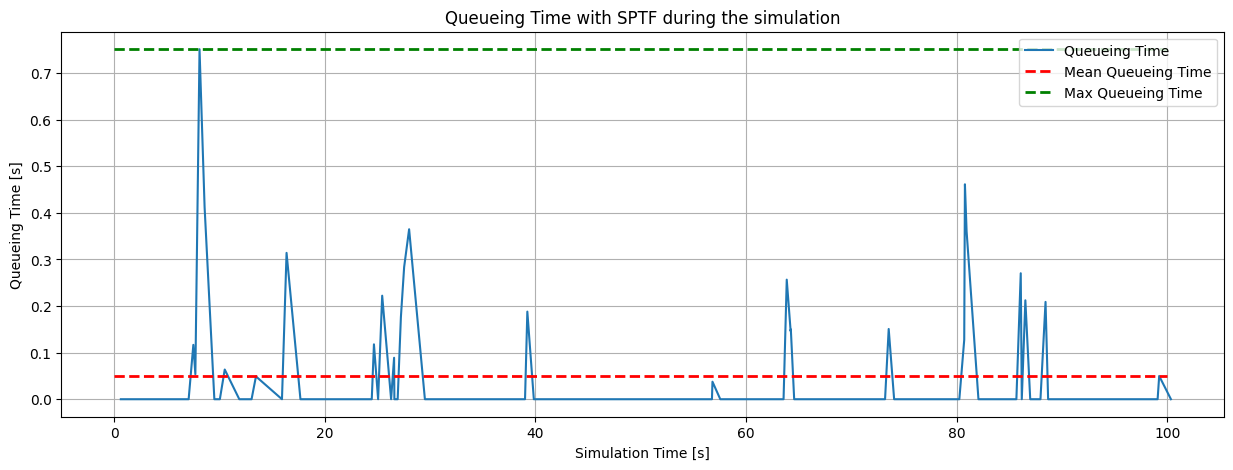

In [132]:
y = queueingTime['queueingTime_value']
x = queueingTime['simTime_elapsed']

ax = plt.figure(figsize=(15,5))
plt.plot(x, y, label = 'Queueing Time' )

queueingTime_mean = np.mean(queueingTime['queueingTime_value'])
queueingTime_max = np.max(queueingTime['queueingTime_value'])

plt.hlines(y=queueingTime_mean, xmin=0, xmax=100, colors='r', linestyles='--', lw=2, label = 'Mean Queueing Time')
plt.hlines(y=queueingTime_max, xmin=0, xmax=100, colors='g', linestyles='--', lw=2, label = 'Max Queueing Time')

plt.xlabel('Simulation Time [s]')
plt.ylabel('Queueing Time [s]')
plt.legend(loc="upper right")
plt.title('Queueing Time with SPTF during the simulation')
plt.grid()
plt.show()

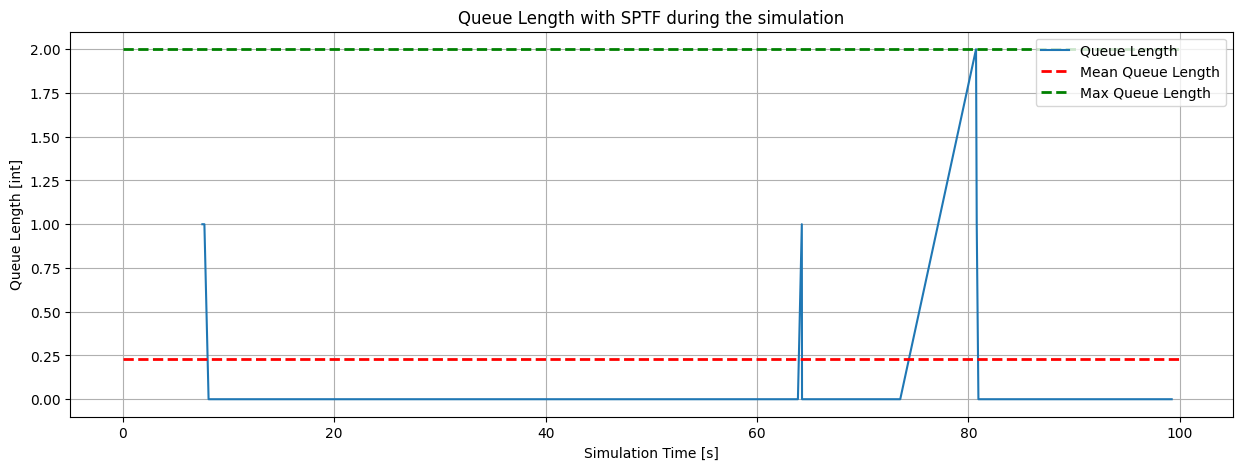

In [134]:
y = queueLength['queueLength_value']
x = queueLength['simTime_elapsed']

ax = plt.figure(figsize=(15,5))
plt.plot(x, y, label = 'Queue Length' )

queueLength_mean = np.mean(queueLength['queueLength_value'])
queueLength_max = np.max(queueLength['queueLength_value'])

plt.hlines(y=queueLength_mean, xmin=0, xmax=100, colors='r', linestyles='--', lw=2, label = 'Mean Queue Length')
plt.hlines(y=queueLength_max, xmin=0, xmax=100, colors='g', linestyles='--', lw=2, label = 'Max Queue Length')

plt.xlabel('Simulation Time [s]')
plt.ylabel('Queue Length [int]')
plt.legend(loc="upper right")
plt.title('Queue Length with SPTF during the simulation')
plt.grid()
plt.show()

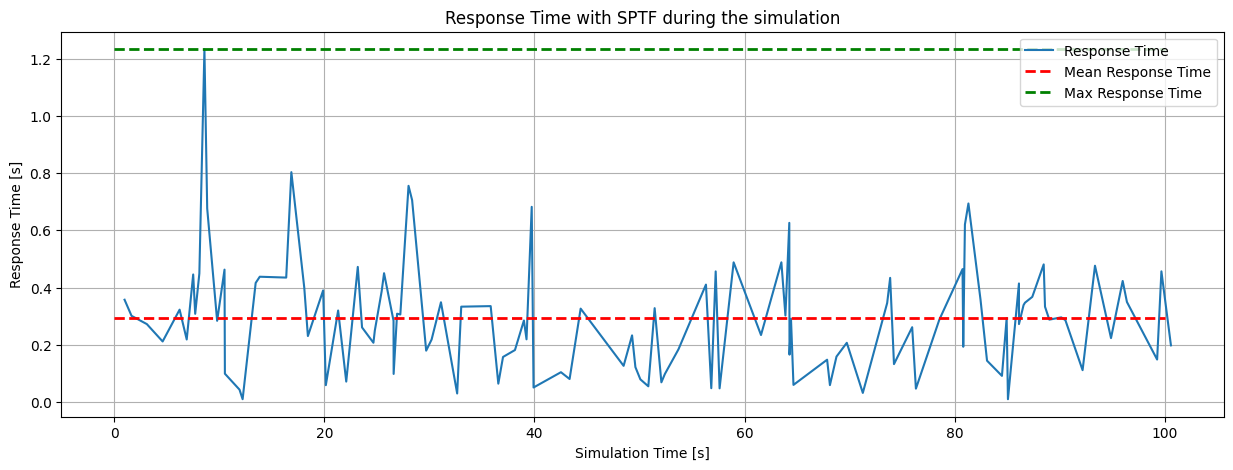

In [135]:
y = responseTime['responseTime_value']
x = responseTime['simTime_elapsed']

ax = plt.figure(figsize=(15,5))
plt.plot(x, y, label = 'Response Time' )

responseTime_mean = np.mean(responseTime['responseTime_value'])
responseTime_max = np.max(responseTime['responseTime_value'])

plt.hlines(y=responseTime_mean, xmin=0, xmax=100, colors='r', linestyles='--', lw=2, label = 'Mean Response Time')
plt.hlines(y=responseTime_max, xmin=0, xmax=100, colors='g', linestyles='--', lw=2, label = 'Max Response Time')

plt.xlabel('Simulation Time [s]')
plt.ylabel('Response Time [s]')
plt.legend(loc="upper right")
plt.title('Response Time with SPTF during the simulation')
plt.grid()
plt.show()

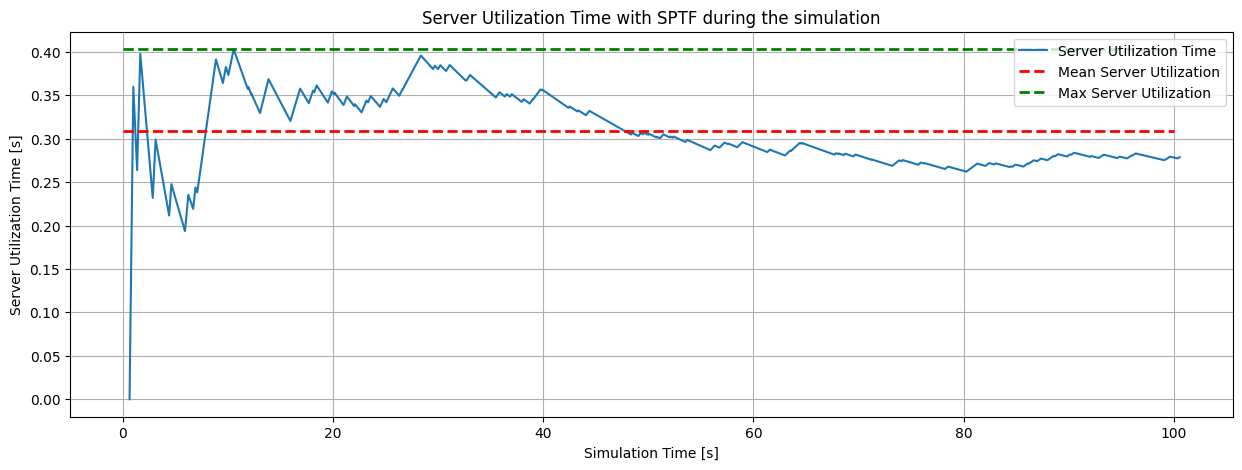

In [136]:
y = serverUtilization['serverUtilization_value']
x = serverUtilization['simTime_elapsed']

ax = plt.figure(figsize=(15,5))
plt.plot(x, y, label = 'Server Utilization Time' )

serverUtilization_mean = np.mean(serverUtilization['serverUtilization_value'])
serverUtilization_max = np.max(serverUtilization['serverUtilization_value'])

plt.hlines(y=serverUtilization_mean, xmin=0, xmax=100, colors='r', linestyles='--', lw=2, label = 'Mean Server Utilization')
plt.hlines(y=serverUtilization_max, xmin=0, xmax=100, colors='g', linestyles='--', lw=2, label = 'Max Server Utilization')

plt.xlabel('Simulation Time [s]')
plt.ylabel('Server Utilization Time [s]')
plt.legend(loc="upper right")
plt.title('Server Utilization Time with SPTF during the simulation')
plt.grid()
plt.show()

In [100]:
df = pd.concat([queueingTime, processTimeValues], axis=1)
df

,simTime_elapsed,queueingTime_value,simTime_elapsed,processTime_value
0,0.636700,0.000000,0.636700,0.357595
1,1.355548,0.000000,1.355548,0.301382
2,2.843231,0.000000,2.843231,0.272442
3,4.404468,0.000000,4.404468,0.211827
4,5.907639,0.000000,5.907639,0.322947
...,...,...,...,...
110,95.544023,0.000000,95.544023,0.423204
111,96.021127,0.000000,96.021127,0.349740
112,99.095532,0.000000,99.095532,0.148718
113,99.244250,0.049897,99.194353,0.406899


In [107]:
df_sorted = df.sort_values(by='processTime_value', ascending=True)

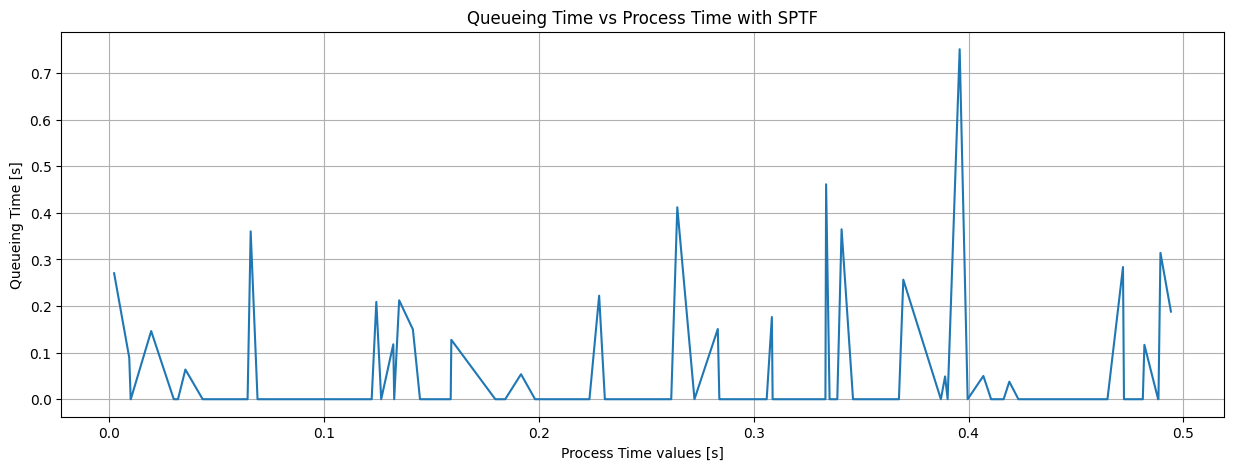

In [108]:
y = df_sorted['queueingTime_value']
x = df_sorted['processTime_value']

plt.figure(figsize=(15,5))
plt.plot(x, y)

plt.xlabel('Process Time values [s]')
plt.ylabel('Queueing Time [s]')
plt.title('Queueing Time vs Process Time with SPTF')
plt.grid()
plt.show()